In [1]:
import pandas as pd
from pandas import Series,DataFrame

"""
IMPORTANT NOTE: If parsing Excel files fails, pip install xlrd AND openpyxl
"""

# Open the excel file as an object
cdc_file = pd.ExcelFile('cdc.xlsx')
# Parse the first sheet of the excel file and set as DataFrame
# get 2006 to calculate change
fluo06 = cdc_file.parse('2006')
fluo06.set_index('State')
fluo06['%'] = pd.to_numeric(fluo06['%'])  # convert_objects is deprecated
fluo06 = fluo06.rename(columns={'%': 'Rate receiving fluoridated water'})

# get 2010 to calculate change
fluo10 = cdc_file.parse('2010')
fluo10.set_index('State')
fluo10['%'] = pd.to_numeric(fluo10['%'])  # convert_objects is deprecated
fluo10 = fluo10.rename(columns={'%': 'Rate receiving fluoridated water'})

cdc_fluor_change_06_10 = pd.merge(fluo06, fluo10, on='State', suffixes=['_2006', '_2010'])
cdc_fluor_change_06_10['fluoride_change_06_10'] = cdc_fluor_change_06_10['Rate receiving fluoridated water_2010'] \
        - cdc_fluor_change_06_10['Rate receiving fluoridated water_2006']
cdc_fluor_change_06_10['fluoride_change_06_10'].describe()

count    52.000000
mean      0.434615
std       6.803283
min     -21.100000
25%      -1.000000
50%       0.300000
75%       0.750000
max      35.000000
Name: fluoride_change_06_10, dtype: float64

In [2]:
# BLS dataset for labor participation
bls_file = pd.ExcelFile('staadata.xlsx')
# Parse the first sheet of the excel file and set as DataFrame
header = ['FIPS Code', 'State and area', 'Year', 'Civilian non-institutional population',
           'Civilian labor force Total', 'CLF Percent of population', 'CLF Employment Total',
           'CLF Employment Percent of population', 'CLF Unemployment Total',
           'CLF Unemployment Rate'
          ]
bls = bls_file.parse('Sheet1', skiprows=7, names=header)
bls14 = bls[bls.Year == 2014]
bls14 = bls14[['State and area','CLF Employment Percent of population','CLF Unemployment Rate']]
bls14['CLF Employment Percent of population'] = pd.to_numeric(bls14['CLF Employment Percent of population'])
bls14['CLF Unemployment Rate'] = pd.to_numeric(bls14['CLF Unemployment Rate'])
bls14.set_index('State and area')

bls10 = bls[bls.Year == 2010]
bls10 = bls10[['State and area','CLF Employment Percent of population','CLF Unemployment Rate']]
bls10['CLF Employment Percent of population'] = pd.to_numeric(bls10['CLF Employment Percent of population'])
bls10['CLF Unemployment Rate'] = pd.to_numeric(bls10['CLF Unemployment Rate'])
bls10.set_index('State and area')

bls_labor_change_14_10 = pd.merge(bls14, bls10, on='State and area', suffixes=['_2014', '_2010'])
bls_labor_change_14_10.set_index('State and area')
bls_labor_change_14_10['change_in_labor_participation_14_10'] = \
    bls_labor_change_14_10['CLF Employment Percent of population_2014'] \
    - bls_labor_change_14_10['CLF Employment Percent of population_2010']
bls_labor_change_14_10['change_in_labor_participation_14_10'].describe()

count    53.000000
mean      0.301887
std       1.058753
min      -2.100000
25%      -0.300000
50%       0.300000
75%       1.100000
max       2.300000
Name: change_in_labor_participation_14_10, dtype: float64

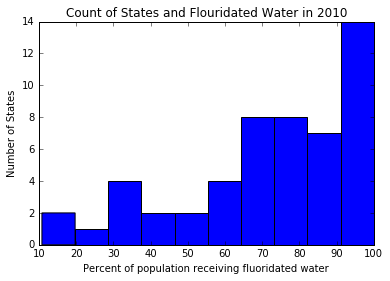

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(fluo10['Rate receiving fluoridated water'])
plt.xlabel('Percent of population receiving fluoridated water')
plt.ylabel('Number of States')
plt.title('Count of States and Flouridated Water in 2010')

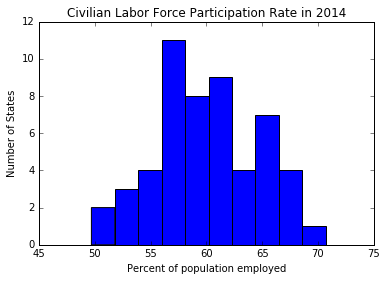

In [4]:
plt.gcf().clear()
plt.hist(bls14['CLF Employment Percent of population'])
plt.xlabel('Percent of population employed')
plt.ylabel('Number of States')
plt.title('Civilian Labor Force Participation Rate in 2014')

In [5]:
# view only rows in the 1st and 4th quartile of water fluoridation changes
first_quartile_fluor = cdc_fluor_change_06_10[cdc_fluor_change_06_10['fluoride_change_06_10'] <= -1.0]
last_quartile_fluor = cdc_fluor_change_06_10[cdc_fluor_change_06_10['fluoride_change_06_10'] >= .75]
first_and_last_qt = pd.concat([first_quartile_fluor, last_quartile_fluor])
first_and_last_qt

,State,Rate receiving fluoridated water_2006,Persons receiving fluoridated water_2006,Persons served by CWS,Rate receiving fluoridated water_2010,Persons receiving fluoridated water_2010,Persons servedby CWS,fluoride_change_06_10
1,Alabama,82.9,3814295,4599030,80.0,3821766,4779736,-2.9
6,Colorado,73.6,3085319,4190698,70.1,3523554,5029196,-3.5
11,Georgia,95.8,8974302,9393941,92.1,8924598,9687653,-3.7
27,Montana,31.3,248850,794563,29.6,233221,788705,-1.7
31,New Jersey,22.6,1771324,7839608,13.5,1111624,8221293,-9.1
36,Ohio,89.3,8948975,10021630,87.7,8772683,10005412,-1.6
37,Oklahoma,73.5,2493521,3392725,64.7,2296459,3547668,-8.8
38,Oregon,27.4,839727,3069204,22.6,833227,3688540,-4.8
41,South Carolina,94.6,3355873,3545617,87.1,3434565,3944594,-7.5
43,Tennessee,93.7,4889987,5220410,91.6,5336600,5827549,-2.1


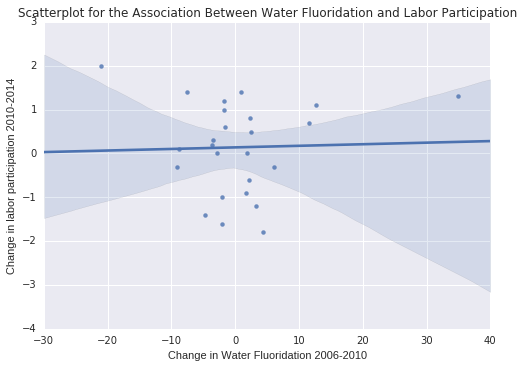

In [6]:
#basic scatterplot:  Q->Q

import seaborn as sns

data = pd.merge(first_and_last_qt, bls_labor_change_14_10, left_on="State", right_on="State and area")
scat1 = sns.regplot(x='fluoride_change_06_10', y='change_in_labor_participation_14_10', data=data)
plt.xlabel('Change in Water Fluoridation 2006-2010')
plt.ylabel('Change in labor participation 2010-2014')
plt.title('Scatterplot for the Association Between Water Fluoridation and Labor Participation')